<a href="https://colab.research.google.com/github/danon6868/BI-ml-course/blob/main/lecture_6_non_param_multi_comp/lecture_6_conspect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = 12, 9

# Данные по экспрессиям B и NK клеток

In [ ]:
path_to_data = "drive/MyDrive/teaching/BI_2022_statistics/lecture_6/homework_lecture_5_data.csv"
data = pd.read_csv(path_to_data, index_col=0)
data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [ ]:
example_gene = "TMCC1"

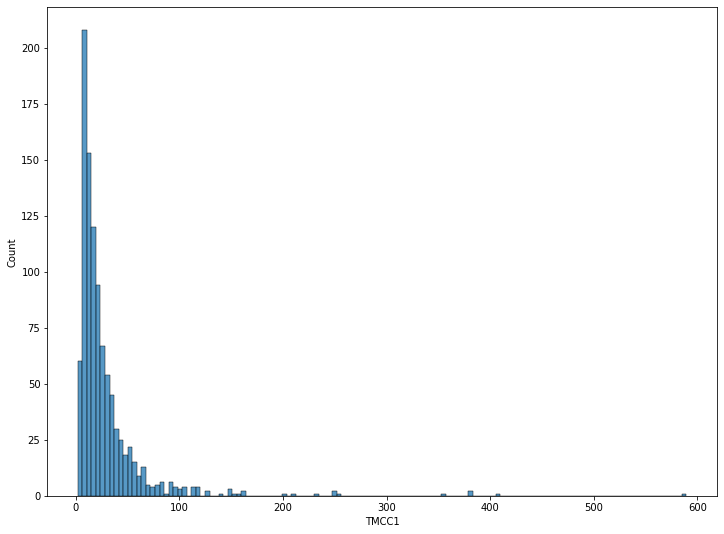

In [ ]:
sns.histplot(data["TMCC1"]);

In [ ]:
from scipy.stats import shapiro

shapiro(data[example_gene])

ShapiroResult(statistic=0.47909480333328247, pvalue=0.0)

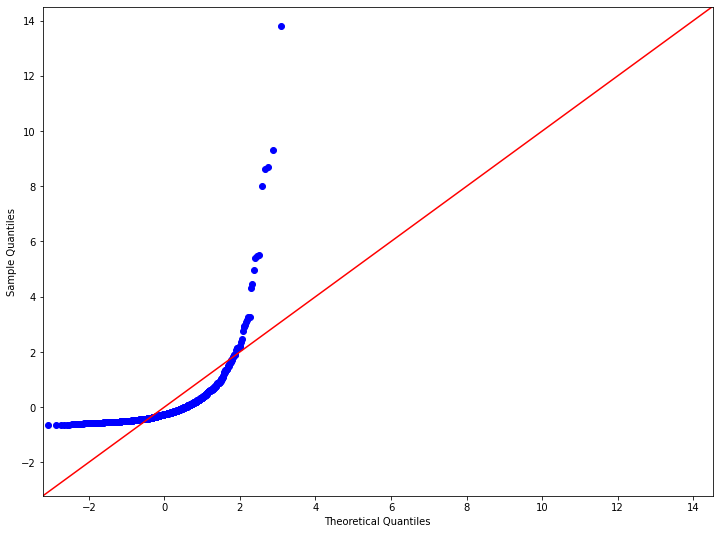

In [ ]:
import statsmodels.api as sm

values = (data[example_gene] - data[example_gene].mean()) / data[example_gene].std()
sm.qqplot(values, line="45");

In [ ]:
b_cells = data.query("Cell_type == 'B_cell'").drop("Cell_type", axis=1)
nk_cells = data.query("Cell_type == 'NK_cell'").drop("Cell_type", axis=1)

## Потестируем что-то

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
alpha = 0.05

In [ ]:
p_values_t_test = ttest_ind(b_cells, nk_cells).pvalue
de_genes_t_test = b_cells.columns[p_values_t_test < alpha]
len(de_genes_t_test)

5276

In [ ]:
p_values_muw = mannwhitneyu(b_cells, nk_cells).pvalue
de_genes_muw = b_cells.columns[p_values_muw < alpha]
len(de_genes_muw)

10532

In [ ]:
from matplotlib_venn import venn2

In [ ]:
common_genes = np.intersect1d(de_genes_t_test, de_genes_muw)
t_test_unique_genes = np.setdiff1d(de_genes_t_test, de_genes_muw)
muw_unique_genes = np.setdiff1d(de_genes_muw, de_genes_t_test)

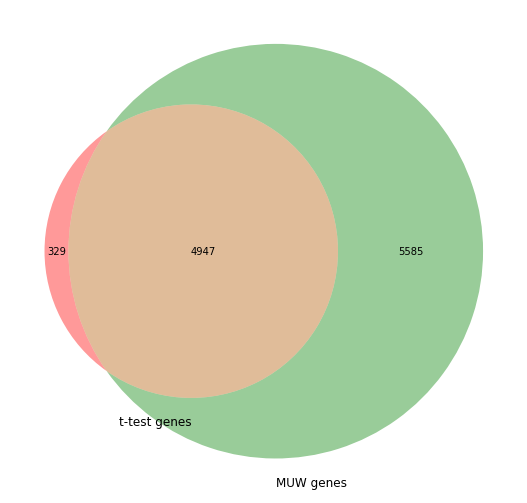

In [ ]:
venn2(subsets = (len(t_test_unique_genes), len(muw_unique_genes), len(common_genes)), 
      set_labels = ("t-test genes", "MUW genes"));

## Множественные сравнения

[Документация](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

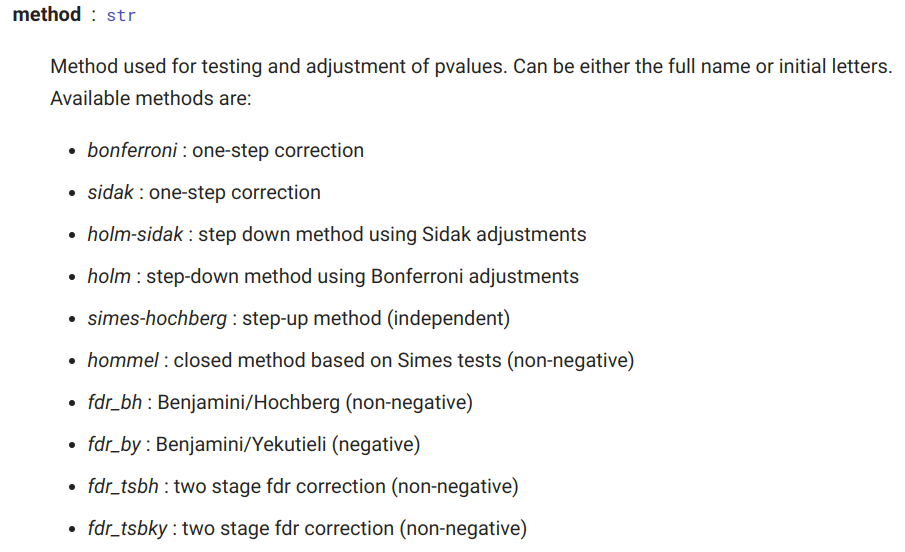

In [ ]:
from statsmodels.stats.multitest import multipletests

In [ ]:
bonf_corr_p_values = multipletests(p_values_t_test, method="bonferroni")[1]
bonf_corr_de_genes_t_test = b_cells.columns[bonf_corr_p_values < alpha]
len(bonf_corr_de_genes_t_test)

1911

In [ ]:
bonf_corr_p_values = multipletests(p_values_muw, method="bonferroni")[1]
bonf_corr_de_genes_muw = b_cells.columns[bonf_corr_p_values < alpha]
len(bonf_corr_de_genes_muw)

5104